In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import abc
from torch.distributions import MultivariateNormal, Poisson
from torch import optim
from torch.utils.data import DataLoader, Dataset
from torch.nn import Module
from torch import nn
from torch.optim.lr_scheduler import StepLR
from main import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import pickle
from scipy.interpolate import CubicSpline

torch.set_default_dtype(torch.float64)

from sklearn.metrics import r2_score
import dill

import scipy

In [2]:
# 20160630

# z_train_filter = np.load('new_params/z_hat_20min_filter.npy')
# plt.plot(z_train_filter[0, :, :100].T)
# plt.show()

# z_train_smooth = np.load('new_params/z_hat_20min_smooth.npy')
# plt.plot(z_train_smooth[0, :, :100].T)
# plt.show()

In [3]:
# dataset = '4g10'
dataset = 'Doherty'
smoothing = True
new = False
z_train = None
if dataset == '4g10':
    data = np.load('data_10ms.npz')
    v_train = Tensor(data['hand_train'].transpose(1,0,2))
    v_test = Tensor(data['hand_test'].transpose(1,0,2))
    Y_train = Tensor(data['neural_train'].transpose(1,0,2))
    Y_test = Tensor(data['neural_test'].transpose(1,0,2))
    print(v_train.shape, v_test.shape, Y_train.shape, Y_test.shape)
    T_trial = 0.01 # 10ms

    p = pickle.load(open('4g10preprocess/10ms.pkl', 'rb'))
    # rec_model = dill.load(open('4g10datamodels/first_10ms_rec.pkl', 'rb'))
    m = dill.load(open('4g10datamodels/first_10ms.pkl', 'rb'))
    rec_model = dill.load(open('4g10datamodels/first_10ms_rec_online.pkl', 'rb'))
    gen_model = rec_model.gen_model

elif dataset == 'Doherty':
    # p = pickle.load(open('new_params/_1t.pkl', 'rb'))
    # z_train = np.load('new_params/z_hat_20min_smooth.npy')

    # p = pickle.load(open('new_params/9k1t.pkl', 'rb'))
    # m = dill.load(open('bgpfa_models/shifted.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/shifted_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/9k.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/9k_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/9ktrain_5kpre.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/9ktrain_5kpre_rec.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/9ktrain_5kpre_rec_CD.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/9ktrain_5kpreNB.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/9ktrain_5kpre_NB_rec.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/9ktrain_5kpre_NB_CD_rec.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/9ktrain_5kpre_NB_new_CD_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/320NB.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/320NB_rec.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/320NB_CD_AB_rec.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/320NB_CD_ABp_rec.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/320NB_CD_ABp_smallrnn_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/320NB_400t.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/320NB_400t_CD_ABp_rec.pkl', 'rb'))
    
    # m = dill.load(open('bgpfa_models/gen_train.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/gen_train_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/320NB_filt.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/320NB_filt_rec.pkl', 'rb'))
    
    # p = pickle.load(open('new_params/5k_20z.pkl', 'rb'))
    # z_train = np.load('new_params/z_hat_5k_20z.npy')
    # m = dill.load(open('bgpfa_models/5k_20z.pkl', 'rb'))
    # # rec_model = dill.load(open('bgpfa_models/5k_20z_rec.pkl', 'rb'))

    # rec_model = dill.load(open('bgpfa_models/5k_20z_rec_new.pkl', 'rb'))
    new = True
    

    # p = pickle.load(open('new_params/5k_30z.pkl', 'rb'))
    # z_train = np.load('new_params/z_hat_5k_30z.npy')
    # m = dill.load(open('bgpfa_models/5k_30z.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_30z_rec.pkl', 'rb'))

    p = pickle.load(open('new_params/_1t.pkl', 'rb'))
    z_train = np.load('new_params/z_hat_20min_smooth.npy')

    # m = dill.load(open('bgpfa_models/5k_10z_notshifted.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_notshifted_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/5k_10z_notshifted_noCD.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_notshifted_noCD_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/5k_10z_notshifted_poisson_noCD.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_notshifted_poisson_noCD_rec_best.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/5k_10z_poisson_noCD2.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_poisson_noCD_rec2.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/5k_10z_NB_noCD.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_NB_noCD_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/5k_10z_NB_CDnew.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_NB_CDnew_rec.pkl', 'rb'))

    train_r2_available = True
    # m = dill.load(open('bgpfa_models/5k_10z_NB_CDnewLSTM.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_NB_CDnewLSTM_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/5k_10z_NB_newLSTM_oldCD.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_NB_newLSTM_newCD_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/5k_10z_NB_newLSTM.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/5k_10z_NB_newLSTM_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/no_init.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/no_init_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/NB_co.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/NB_co_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/NB_co_long.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/NB_co_long_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/NB_co_bi.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/NB_co_bi_rec.pkl', 'rb'))

    m = dill.load(open('bgpfa_models/NB_co_long_bi.pkl', 'rb'))
    rec_model = dill.load(open('bgpfa_models/NB_co_long_bi_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/NB_co_long_bi_new.pkl', 'rb'))
    # # rec_model = dill.load(open('bgpfa_models/NB_co_long_bi_new_rec.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/NB_co_long_bi_newCD_rec.pkl', 'rb'))

    # m = dill.load(open('bgpfa_models/no_init_long.pkl', 'rb'))
    # rec_model = dill.load(open('bgpfa_models/no_init_long_rec.pkl', 'rb'))


    gen_model = rec_model.gen_model

    data_len = 22800
    # data_len = 20000
    trial_len = rec_model.gen_model.Y.shape[-1]
    train_len = 12800
    # train_len = 5000
    # test_trial_len = data_len - train_len
    test_trial_len = 1000

    data = pickle.load(open('data/Doherty_example.pickled', 'rb')) # load example data
    binsize = 25 # binsize in ms
    T_trial = 0.025 # 25ms
    start = 0
    timepoints = np.arange(start, data_len+start) #subsample ~40 seconds of data so things will run somewhat quicker
    # print(data['Y'].shape)
    fit_data = {'Y': data['Y'][..., timepoints], 'locs': data['locs'][timepoints, :], 'targets': data['targets'][timepoints, :], 'binsize': binsize}
    Y = fit_data['Y'] # these are the actual recordings and is the input to our model
    targets = fit_data['targets'] # these are the target locations
    locs = fit_data['locs'] # these are the hand positions

    # Y = Y[:, np.mean(Y,axis = (0, 2))/0.025 > 2, :] #subsample highly active neurons so things will run a bit quicker
    Y = Y[:, np.mean(Y,axis = (0, 2))/0.025 > 0, :]
    # print(Y.shape)
    ntrials, n, T = Y.shape # Y should have shape: [number of trials (here 1) x neurons x time points]

    ts = np.arange(Y.shape[-1])*fit_data['binsize'] # measured in ms
    cs = CubicSpline(ts, locs) # fit cubic spline to behavior
    delay = 120
    vels = cs(ts+delay, 1) # velocity (first derivative)
    v = Tensor(vels.T[None, ...])
    def convert_to_trials(_Y, _z=None, _v=None, t=None):
        assert _Y.shape[-1] % t == 0
        N = _Y.shape[1]
        ntrials = _Y.shape[-1] // t
        Y = _Y.transpose(1,0,2).reshape(N,ntrials,-1).transpose(1,0,2)
        z = None
        if _z is not None:
            b = _z.shape[1]
            z = _z.transpose(1,0,2).reshape(b,ntrials,-1).transpose(1,0,2)
        v = None
        if _v is not None:
            b_v = _v.shape[1]
            v = _v.permute(1,0,2).reshape(b_v,ntrials,-1).permute(1,0,2)
        return Y, z, v

    print(Y.shape, 'original Y shape')
    Y_train = Y[..., :train_len]
    # z_train = z[..., :train_len]
    v_train = v[..., :train_len]
    Y_test = Y[..., train_len:]
    # z_test = z[..., train_len:]
    v_test = v[..., train_len:]

    z_train = z_train[:,:,:train_len]

    Y_train, z_train, v_train = convert_to_trials(Y_train, z_train, v_train, trial_len)
    Y_test, _, v_test = convert_to_trials(Y_test, None, v_test, test_trial_len)
    Y_train = Tensor(Y_train)
    Y_test = Tensor(Y_test)
    print(Y_train.shape, v_train.shape, 'y_train, v_train shape')
    print(Y_test.shape, v_test.shape, 'y_test, v_test shape')

    Y_train_flat = Y_train.permute(1,0,2).reshape(n, -1).unsqueeze(0)
    Y_test_flat = Y_test.permute(1,0,2).reshape(n, -1).unsqueeze(0)

    print(Y_train_flat.shape, Y_test_flat.shape, 'y train flat, y test flat shape')

if not hasattr(rec_model, 'train_neurons'):
    rec_model.train_neurons = None

(1, 200, 22800) original Y shape
torch.Size([128, 200, 100]) torch.Size([128, 2, 100]) y_train, v_train shape
torch.Size([10, 200, 1000]) torch.Size([10, 2, 1000]) y_test, v_test shape
torch.Size([1, 200, 12800]) torch.Size([1, 200, 10000]) y train flat, y test flat shape


In [4]:
print(rec_model.neural_net)

MyLSTMModel(
  (lstm): LSTM(180, 180, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=360, out_features=200, bias=True)
)


In [5]:
print(rec_model.preprocessor.v.shape)

torch.Size([128, 2, 100])


In [6]:
# plt.plot(v_test[:,0,:].flatten())
# plt.plot(v_test[:,1,:].flatten())
# plt.show()

# plt.plot(torch.mean(Y_test, axis=1).flatten())

In [7]:
# z_train_filter = p.get_z_hat(v_train, smoothing=True).detach().cpu().numpy()
# print(z_train_filter.shape)
# np.save('new_params/z_hat_5k_30z.npy', z_train_filter)

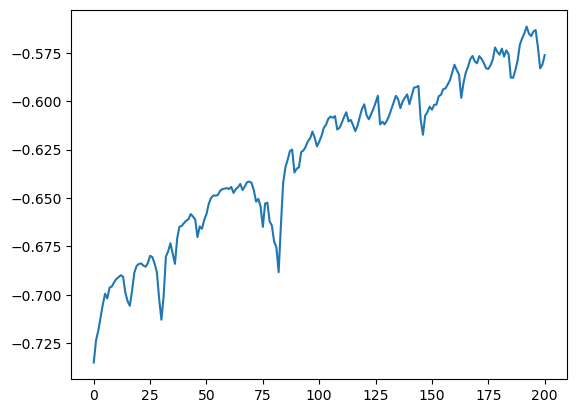

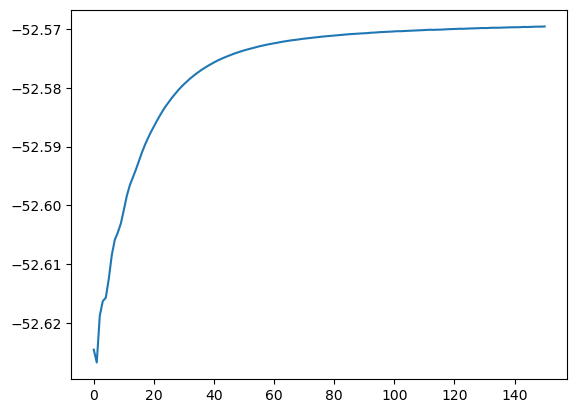

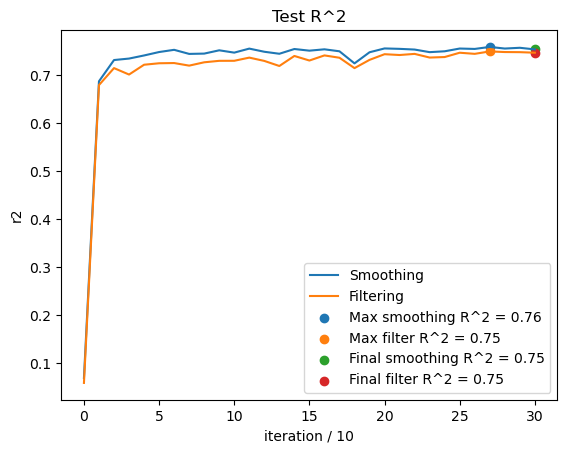

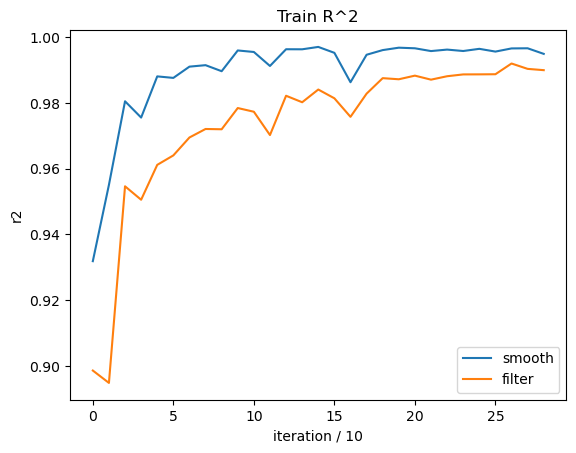

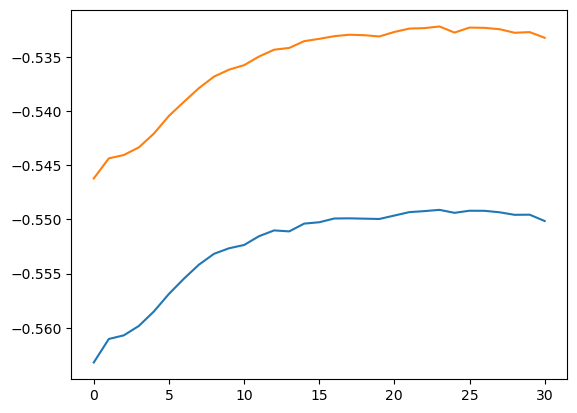

In [8]:
plt.plot(rec_model.LLs[100:])
plt.show()
plt.plot(gen_model.LLs[:])
plt.show()

# if new:
if hasattr(rec_model, 'r2_smooth'):
    start = 0
    plt.plot(rec_model.r2_smooth[start:], label='Smoothing')
    plt.plot(rec_model.r2_filt[start:], label='Filtering')

    max_r2 = np.max(rec_model.r2_smooth[start:])
    max_r2_idx = np.argmax(rec_model.r2_smooth[start:])
    plt.scatter(max_r2_idx, max_r2, label=f'Max smoothing R^2 = {max_r2:.2f}')
   
    max_r2 = np.max(rec_model.r2_filt[start:])
    max_r2_idx = np.argmax(rec_model.r2_filt[start:])
    plt.scatter(max_r2_idx, max_r2, label=f'Max filter R^2 = {max_r2:.2f}')

    # Plot the last R^2 value
    plt.scatter(len(rec_model.r2_smooth)-start-1, rec_model.r2_smooth[-1], label=f'Final smoothing R^2 = {rec_model.r2_smooth[-1]:.2f}')
    plt.scatter(len(rec_model.r2_filt)-start-1, rec_model.r2_filt[-1], label=f'Final filter R^2 = {rec_model.r2_filt[-1]:.2f}') 



    plt.legend()
    plt.xlabel('iteration / 10')
    plt.ylabel('r2')
    plt.title('Test R^2')
    plt.show()

# if train_r2_available:
if hasattr(rec_model, 'r2_smooth_train'):
    start = 2
    plt.plot(rec_model.r2_smooth_train[start:], label='smooth')
    plt.plot(rec_model.r2_filt_train[start:], label='filter')
    plt.legend()
    plt.xlabel('iteration / 10')
    plt.ylabel('r2')
    plt.title('Train R^2')
    plt.show()

if hasattr(rec_model, 'train_co_smoothing_vals'):
    plt.plot(rec_model.train_co_smoothing_vals, label='train')
    plt.plot(rec_model.test_co_smoothing_vals, label='test')
    plt.show()

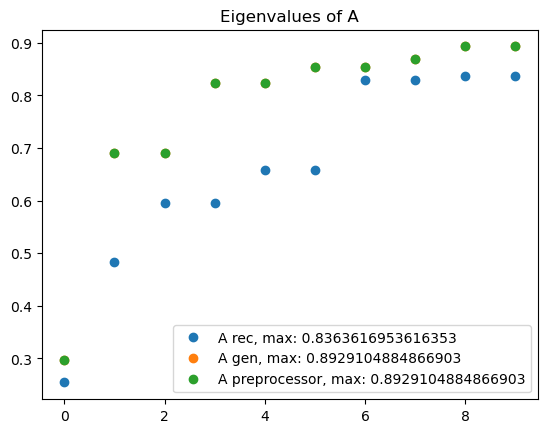

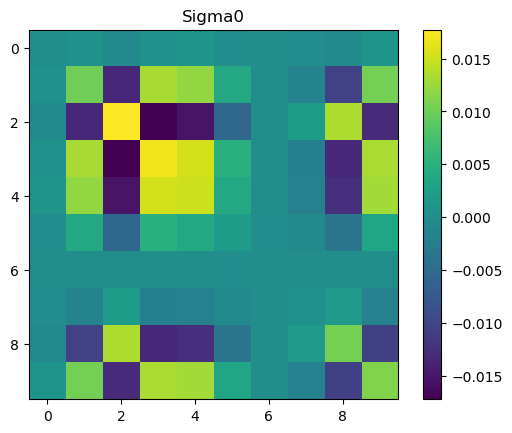

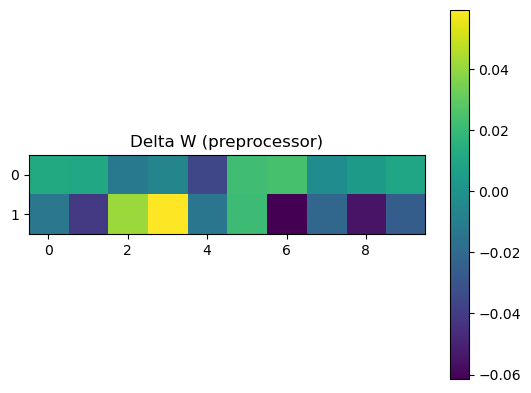

tensor([[ 7.5922e-06, -1.2206e-06],
        [-1.2206e-06,  7.5767e-06]], device='cuda:0', grad_fn=<AddBackward0>) tensor([[3.1788e-06, 9.3212e-07],
        [9.3212e-07, 3.1250e-06]], device='cuda:0')


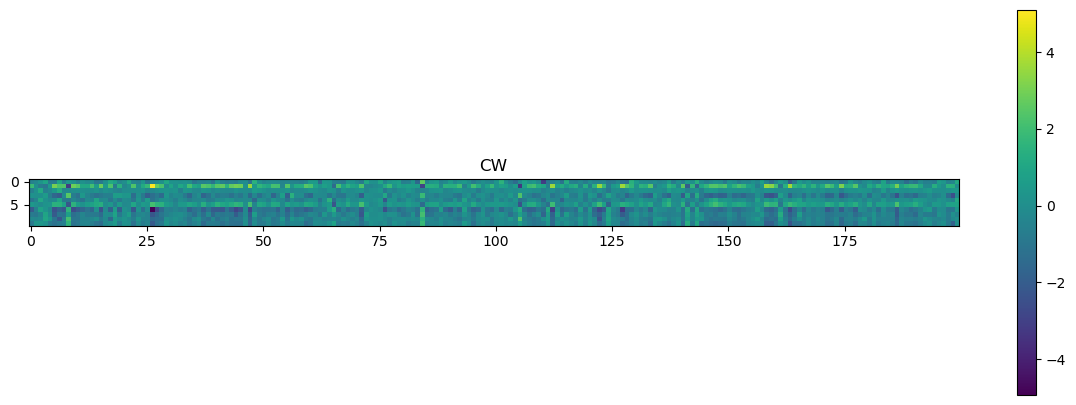

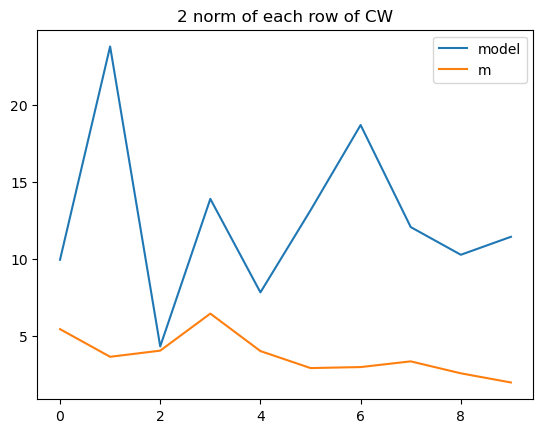

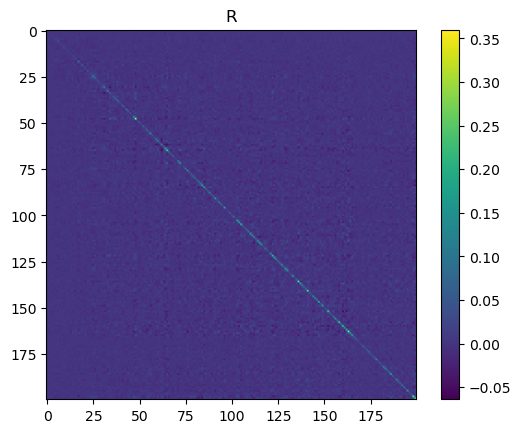

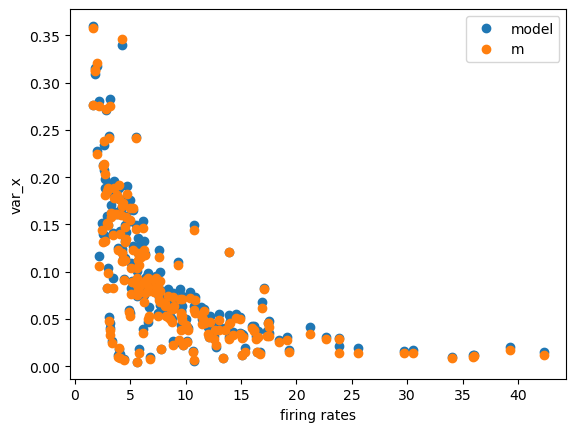

Text(0, 0.5, 'd')

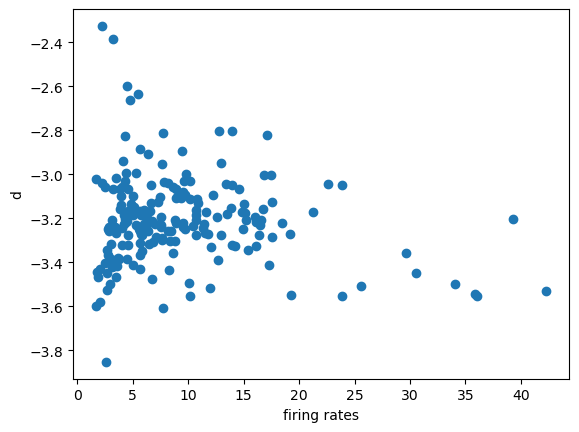

In [9]:
eigs = sorted(np.abs(np.linalg.eigvals(gen_model.A[0].detach().cpu().numpy())))
plt.plot(eigs, 'o', label='A rec, max: {}'.format(np.max(eigs)))
eigs = sorted(np.abs(np.linalg.eigvals(m.A[0].detach().cpu().numpy())))
plt.plot(eigs, 'o', label='A gen, max: {}'.format(np.max(eigs)))
eigs = sorted(np.abs(np.linalg.eigvals(p.A.detach().cpu().numpy())))
plt.plot(eigs, 'o', label='A preprocessor, max: {}'.format(np.max(eigs)))
plt.legend()
plt.title('Eigenvalues of A')
plt.show()

plt.imshow(p.Sigma0.detach().cpu().numpy())
plt.colorbar()
plt.title('Sigma0')
plt.show()
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(rec_model.preprocessor.W.detach().cpu().numpy())
# ax[0].set_title('W new')
# ax[1].imshow(p.W.detach().cpu().numpy())
# ax[1].set_title('W orig')
# plt.show()
plt.imshow(rec_model.preprocessor.W.detach().cpu().numpy() - p.W.detach().cpu().numpy())
plt.colorbar()
plt.title('Delta W (preprocessor)')
plt.show()

print(rec_model.preprocessor.R, p.R)

# plt.imshow(gen_model.A[0].detach().cpu().numpy() - m.A[0].detach().cpu().numpy())
# plt.colorbar()
# plt.title('Delta A')
# plt.show()

# plt.imshow(gen_model.Q[0].detach().cpu().numpy() - m.Q[0].detach().cpu().numpy())
# plt.colorbar()
# plt.title('Delta Q')
# plt.show()

plt.figure(figsize=(15, 5))  # Adjust as needed
plt.imshow((gen_model.C @ gen_model.W)[0].detach().cpu().numpy().T)
plt.colorbar()
plt.title('CW')
plt.show()

# plt.figure(figsize=(15, 5))  # Adjust as needed
# # m = dill.load(open('4g10datamodels/new_full_R.pkl', 'rb'))
# plt.imshow((m.C @ m.W)[0].detach().cpu().numpy().T)
# plt.colorbar()
# plt.title('CW (orig gen model)')
# plt.show()

# plt.figure(figsize=(15, 5))  # Adjust as needed
# plt.imshow((m.C @ m.W)[0].detach().cpu().numpy().T - (gen_model.C @ gen_model.W)[0].detach().cpu().numpy().T)
# plt.colorbar()
# plt.title('CW delta')
# plt.show()

# plot 2 norm of each row of CW
plt.plot(torch.linalg.norm((gen_model.C @ gen_model.W)[0], dim=0).detach().cpu().numpy(), label='model')
plt.plot(torch.linalg.norm((m.C @ m.W)[0], dim=0).detach().cpu().numpy(), label='m')
plt.legend()
plt.title('2 norm of each row of CW')
plt.show()

plt.imshow(gen_model.R.squeeze(0).detach().cpu().numpy())
plt.colorbar()
plt.title('R')
plt.show()

# # plot Delta R between model and m
# plt.imshow((model.R.squeeze(0) - m.R.squeeze(0)).detach().cpu().numpy())
# plt.colorbar()
# plt.title('Delta R')
# plt.show()

plt.plot(Y_train.mean(dim=(0,2))/T_trial, torch.diag(gen_model.R.squeeze()).detach().cpu().numpy(), 'o', label='model')
plt.plot(Y_train.mean(dim=(0,2))/T_trial, torch.diag(m.R.squeeze()).detach().cpu().numpy(), 'o', label='m')
plt.legend()
plt.xlabel('firing rates')
plt.ylabel('var_x')
plt.show()


plt.plot(Y_train.mean(dim=(0,2))/T_trial, gen_model.d.detach().cpu().numpy(), 'o')
plt.xlabel('firing rates')
plt.ylabel('d')

/home/ayush/anaconda3/lib/python3.11/site-packages/torch/nn/modules/rnn.py:812: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:982.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


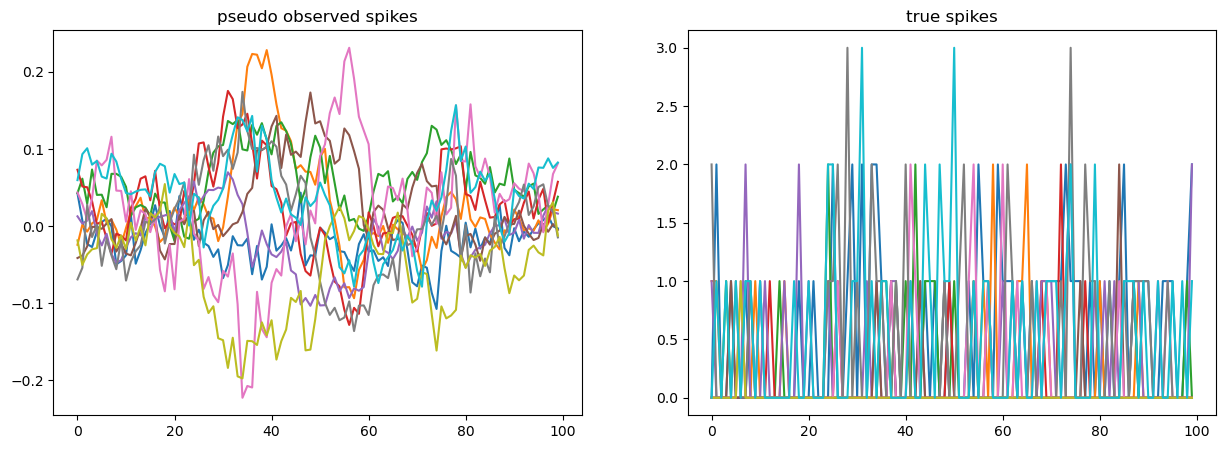

In [10]:
neural_net = rec_model.neural_net
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for n in range(10):
    if rec_model.train_neurons is not None:
        ax[0].plot(neural_net(rec_model.gen_model.Y[:, rec_model.train_neurons, :].transpose(1, 2)).transpose(1,2)[0, n, :].detach().cpu().numpy())
    else:
        ax[0].plot(neural_net(rec_model.gen_model.Y.transpose(1, 2)).transpose(1,2)[0, n, :].detach().cpu().numpy())
    # ax[0].plot(neural_net(rec_model.gen_model.Y.transpose(1, 2))['x_tilde'].transpose(1,2)[0, n, :].detach().cpu().numpy())
# plt.show()
for n in range(10):
    ax[1].plot(Y_train[0, n, :].detach().cpu().numpy())   
ax[0].set_title('pseudo observed spikes')
ax[1].set_title('true spikes')
plt.show()

In [11]:
rec_model.freeze_params()
print(smoothing)
torch.cuda.empty_cache()
if rec_model.train_neurons is not None:
    np.random.seed(0)
    torch.manual_seed(0)
    z_train_inferred, z_train_inferred_samps = rec_model.test_z(rec_model.gen_model.Y, smoothing=smoothing, samples=100, batch=10, train_indices=rec_model.train_neurons)
else:
    np.random.seed(0)
    torch.manual_seed(0)
    z_train_inferred, z_train_inferred_samps = rec_model.test_z(rec_model.gen_model.Y, smoothing=smoothing, samples=0, batch=10)
torch.cuda.empty_cache()

if rec_model.train_neurons is not None:
    z_test_inferred, z_test_inferred_samps = rec_model.test_z(Y_test.to(device), smoothing=smoothing, samples=100, batch=10, train_indices=rec_model.train_neurons)
else:
    z_test_inferred, z_test_inferred_samps = rec_model.test_z(Y_test.to(device), smoothing=smoothing, samples=0, batch=10)


torch.cuda.empty_cache()
print(z_train_inferred.shape, z_test_inferred.shape, 'z_train_inferred, z_test_inferred shape')

v_train_inferred = (rec_model.preprocessor.W.detach().cpu().numpy() @ z_train_inferred)
v_test_inferred = (rec_model.preprocessor.W.detach().cpu().numpy() @ z_test_inferred)
print(v_train_inferred.shape, v_test_inferred.shape, 'v_train_inferred, v_test_inferred shape')


True
(128, 10, 100) (10, 10, 1000) z_train_inferred, z_test_inferred shape
(128, 2, 100) (10, 2, 1000) v_train_inferred, v_test_inferred shape


In [12]:
_nsamps, _ntrials, _N, _T = z_train_inferred_samps.shape
z_train_inferred_samps = z_train_inferred_samps.transpose(0,2,1,3).reshape((_nsamps, _N, _T*_ntrials))[:, None, ...]

_nsamps, _ntrials, _N, _T = z_test_inferred_samps.shape
z_test_inferred_samps = z_test_inferred_samps.transpose(0,2,1,3).reshape((_nsamps, _N, _T*_ntrials))[:, None, ...]

print(z_train_inferred_samps.shape, z_test_inferred_samps.shape)

(100, 1, 10, 12800) (100, 1, 10, 10000)


In [13]:
# zz_dim = 2
# train_start = 1200
# train_end = 1600

# for zz in range(10):
#     for s in range(z_test_inferred_samps.shape[0]):
#         plt.plot(z_train_inferred_samps[s, :, zz, :].flatten()[train_start:train_end], alpha=0.1)
#     plt.plot(z_train_inferred[:, zz, :].flatten()[train_start:train_end], label='inferred')
#     plt.plot(z_train_inferred_samps[:, :, zz, :].mean(axis=0).flatten()[train_start:train_end], label='sample mean')
#     # plt.plot(z_train_inferred_samps[:, 0, zz, :100].T, alpha=0.1)
#     plt.legend()
#     plt.title('Train')
#     plt.show()

# plt.plot(z_test_inferred[0, zz_dim, :100], label='inferred')
# plt.plot(z_test_inferred_samps[:, 0, zz_dim, :100].T, alpha=0.1)
# plt.plot(z_test_inferred_samps[:, 0, zz_dim, :100].mean(axis=0), label='sample mean')
# plt.legend()
# plt.title('Test')
# plt.show()

# # fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# # ax[0].plot(z_train_inferred[0, :, :100].T)
# # ax[0].set_title('Train inferred')
# # ax[1].plot(z_train_inferred_samps[:, 0, :, :100].mean(axis=0).T)
# # ax[1].set_title('Train inferred sample mean')
# # plt.show()

# # plt.plot(z_train_inferred[0, :, :100].T)
# # # plt.plot(z_train_inferred_samps[:, 0, :, :100].T, alpha=0.1)
# # plt.plot(z_train_inferred_samps[:, 0, :, :100].mean(axis=0).T, linestyle='--')
# # plt.show()

In [14]:
F_bgpfa = np.load('bgpfa_firing_rates.npy')
F = rec_model.get_firing_rates(z_train_inferred_samps)[0].numpy()

F_test = rec_model.get_firing_rates(z_test_inferred_samps)[0].numpy()

In [15]:

# F_other_train = np.load('NB_co_long_bi_new_rec_firing_rates_train.npy')
# F_other_test = np.load('NB_co_long_bi_new_rec_firing_rates_test.npy')

F_other_train = np.load('NB_co_long_bi_newCD_rec_firing_rates_train.npy')
F_other_test = np.load('NB_co_long_bi_newCD_rec_firing_rates_test.npy')

In [16]:
# np.save('NB_co_long_bi_new_rec_firing_rates_train.npy', F)
# np.save('NB_co_long_bi_new_rec_firing_rates_test.npy', F_test)

# np.save('NB_co_long_bi_newCD_rec_firing_rates_train.npy', F)
# np.save('NB_co_long_bi_newCD_rec_firing_rates_test.npy', F_test)

In [17]:
np.random.seed(0)
indices = np.random.choice(200, 20, replace=False)

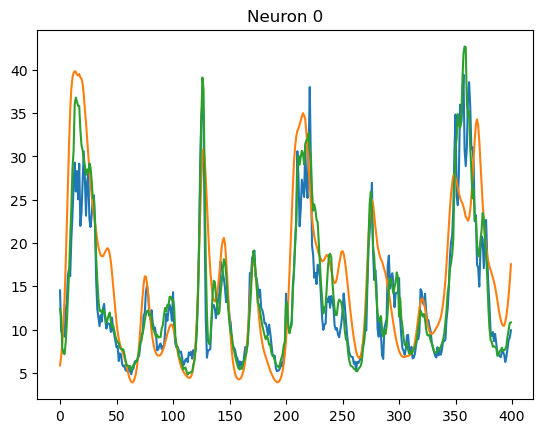

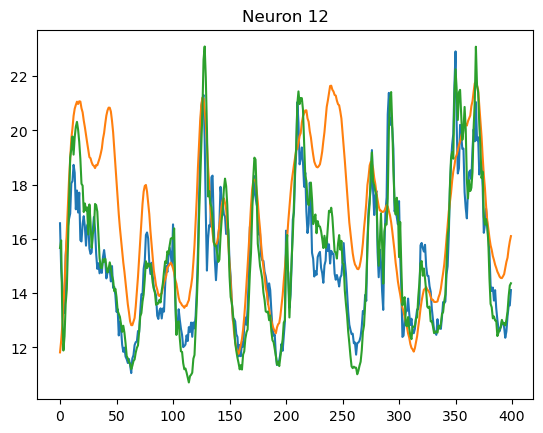

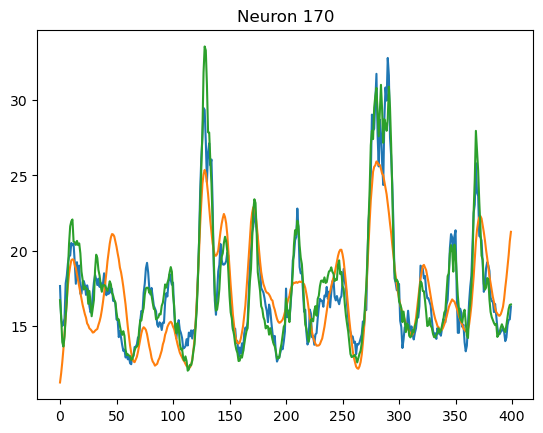

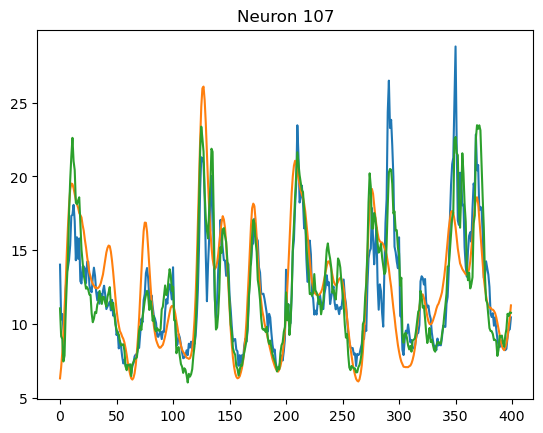

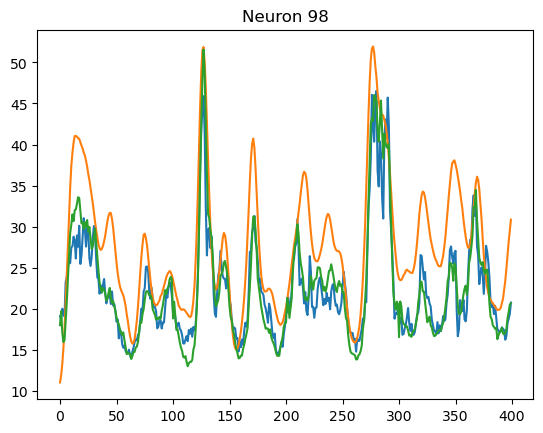

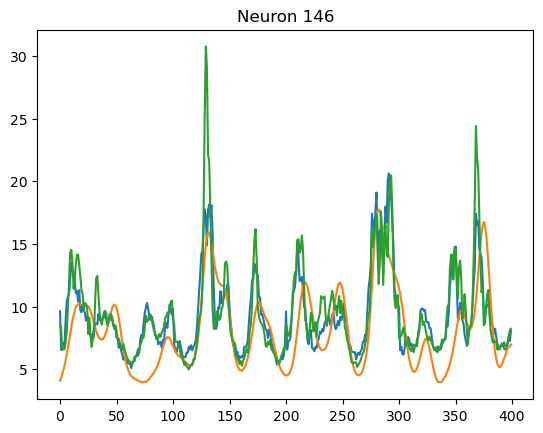

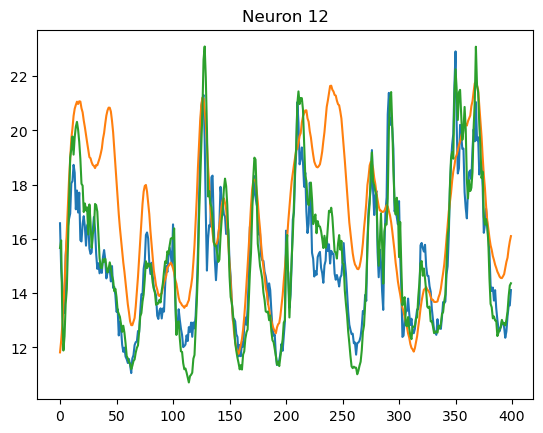

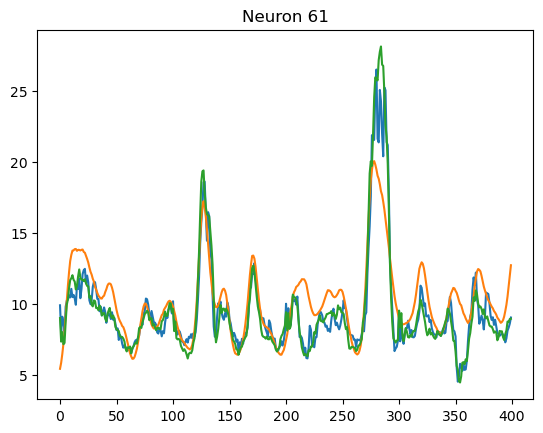

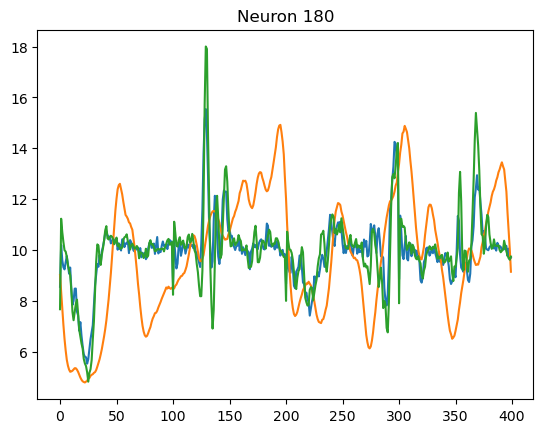

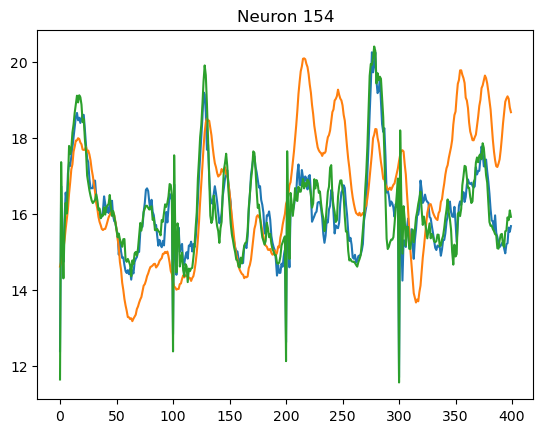

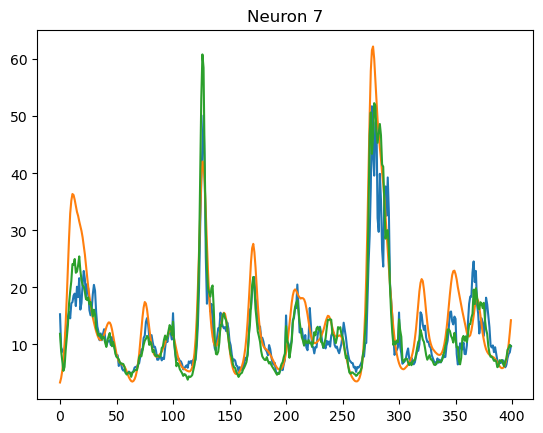

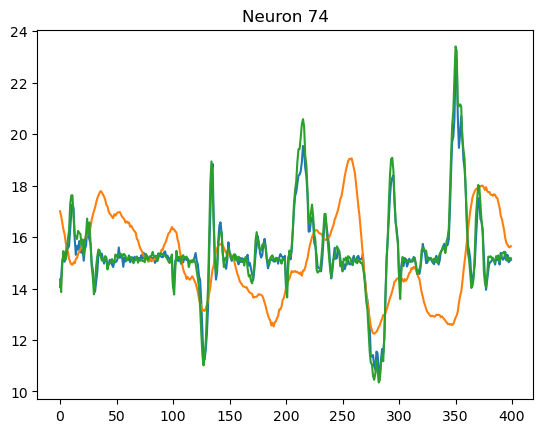

tensor(-0.5231)


In [18]:
bgpfa_indices = np.load('bgpfa_neuron_indeces.npy')
start =1200
end = start+400
for neuron in [0,12]:
    _F = F[:, neuron, :].flatten()
    plt.plot(_F[start:end]/T_trial)
    bgpfa_neuron = np.where(bgpfa_indices == neuron)[0][0]
    plt.plot(F_bgpfa[0, bgpfa_neuron, start:end]/T_trial)
    plt.plot(F_other_train[:, neuron, start:end].flatten()/T_trial)
    plt.title(f'Neuron {neuron}')
    plt.show()

for neuron in indices:
    if neuron not in bgpfa_indices:
        continue
    bgpfa_neuron = np.where(bgpfa_indices == neuron)[0][0]
    _F = F[:, neuron, :].flatten()
    plt.plot(_F[start:end]/T_trial)
    plt.plot(F_bgpfa[0, bgpfa_neuron, start:end]/T_trial)
    plt.plot(F_other_train[:, neuron, start:end].flatten()/T_trial)
    plt.title(f'Neuron {neuron}')
    plt.show()
print(rec_model.co_smoothing(Y_train_flat, Tensor(F))[0])

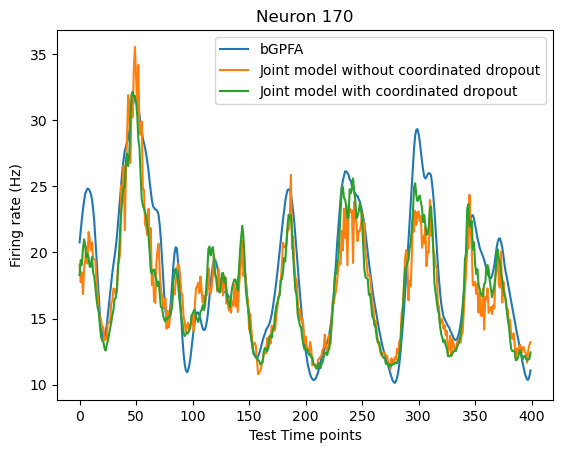

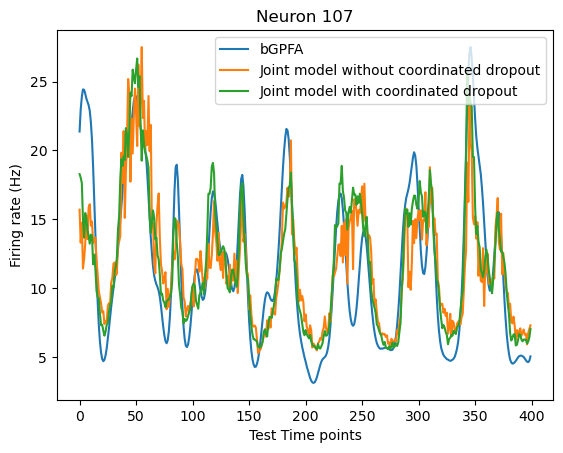

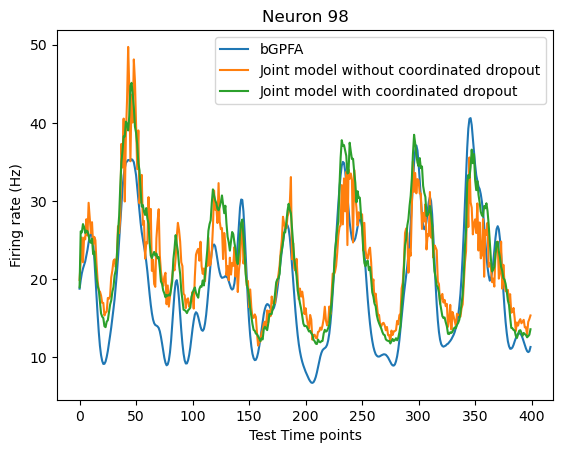

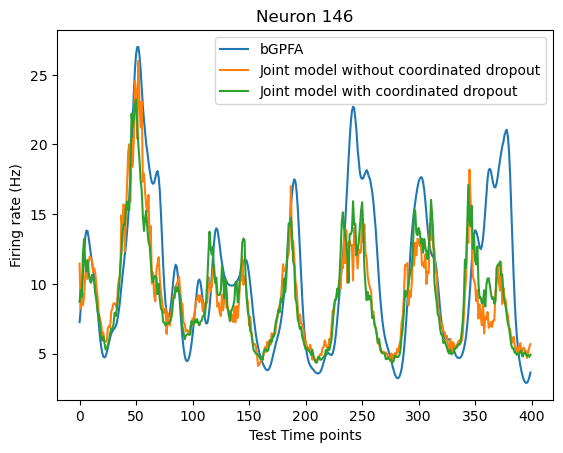

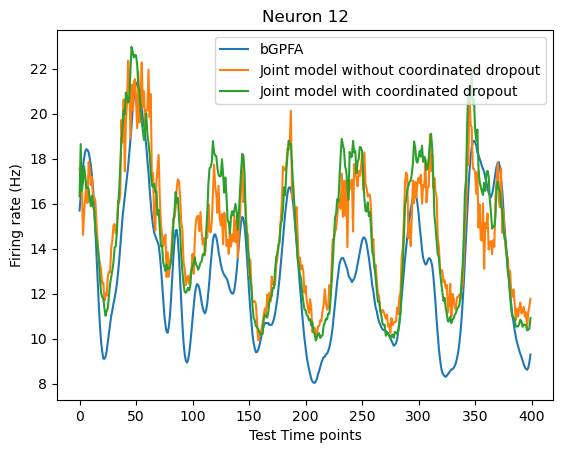

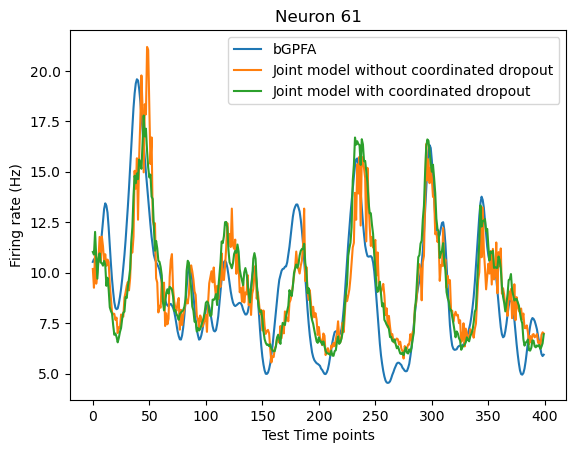

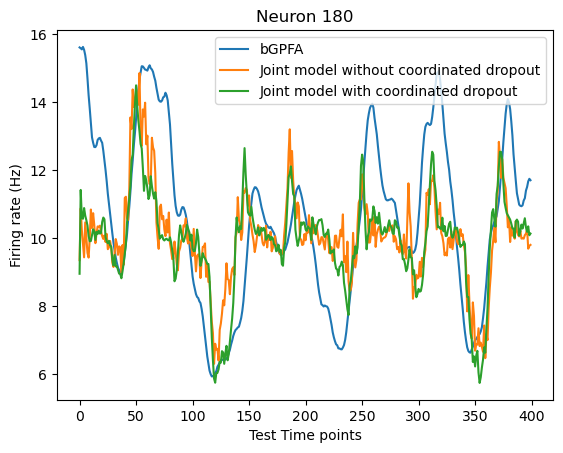

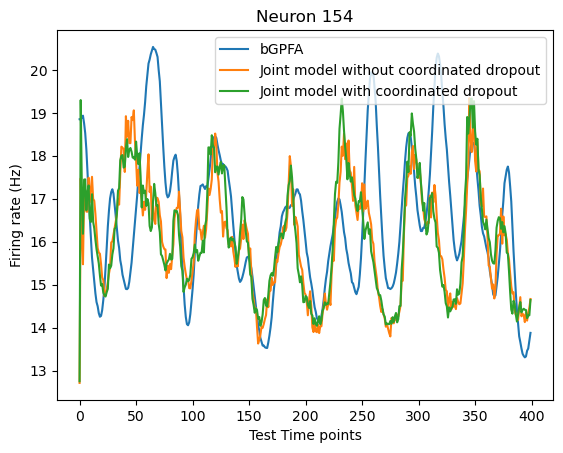

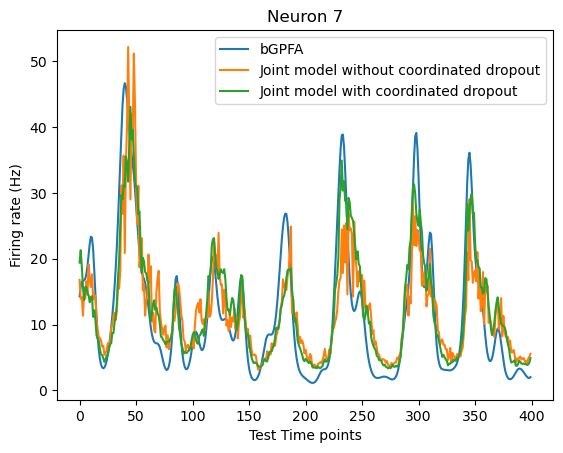

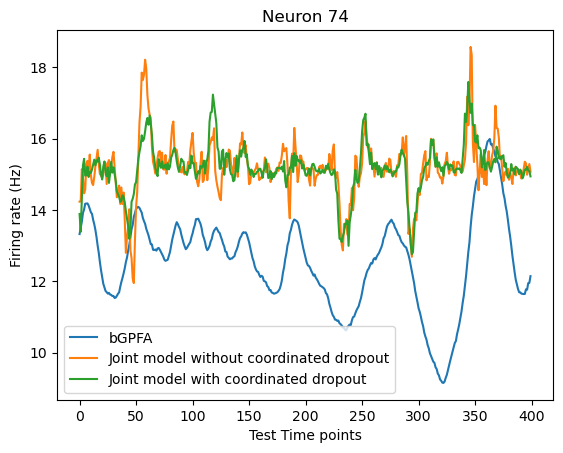

In [33]:
F_bgpfa_test = np.load('bgpfa_firing_rates2.npy')
F_bgpfa_test = F_bgpfa_test[..., 2800:]
start = 0
end = start + 400
for neuron in indices:
    if neuron not in bgpfa_indices:
        continue
    bgpfa_neuron = np.where(bgpfa_indices == neuron)[0][0]
    _F = F_test[:, neuron, :].flatten()
    plt.plot(F_bgpfa_test[0, bgpfa_neuron, start:end]/T_trial, label='bGPFA')
    plt.plot(_F[start:end]/T_trial, label='Joint model without coordinated dropout')
    plt.plot(F_other_test[:, neuron, start:end].flatten()/T_trial, label='Joint model with coordinated dropout')
    plt.legend()
    plt.title(f'Neuron {neuron}')
    plt.ylabel('Firing rate (Hz)')
    plt.xlabel('Test Time points')
    # if neuron in [7, 170]:
    #     plt.savefig(f'neuron_{neuron}_F.png')
    plt.show()

In [20]:
# F *= 0.025
print(scipy.stats.poisson.logpmf(Y_train_flat.numpy(), F).mean())
print(scipy.stats.poisson.logpmf(Y_train_flat[0,0,:F_bgpfa.shape[-1]].numpy(), F_bgpfa[0,0,:]).mean())
print(scipy.stats.poisson.logpmf(Y_train_flat[0,0,:F_bgpfa.shape[-1]].numpy(), F[0,0,:F_bgpfa.shape[-1]]).mean())

# print(scipy.stats.poisson.logpmf(Y_train_flat[0,0,start:end].numpy(), F_bgpfa[0,0,start:end]).mean())
# print(scipy.stats.poisson.logpmf(Y_train_flat[0,0,start:end].numpy(), F[0,0,start:end]).mean())

# print(scipy.stats.pearsonr(F_bgpfa[0,0,start:end].flatten(), F[0,0,start:end].flatten()))
# print(np.mean((F_bgpfa[0,0,start:end].flatten() - F[0,0,start:end].flatten())**2))

-0.523098101231177
-0.7450555546913298
-0.769905015559526


In [21]:
# # F = torch.functional.F.softplus(rec_model.gen_model.C.detach().cpu() @ rec_model.gen_model.W.detach().cpu() @ z_train_inferred  + rec_model.gen_model.d.detach().cpu()[:, None])
# # # F = rec_model.gen_model.C.detach().cpu() @ rec_model.gen_model.W.detach().cpu() @ z_train_inferred  + rec_model.gen_model.d.detach().cpu()[:, None]
# # for neuron in [0,12]:
# #     _F = F[:, neuron, :].flatten() / 0.025
# #     plt.plot(_F[1200:1600])
# # plt.title('Train firing rate (directly using mean inferred z)')
# # plt.show()


# # X = rec_model.gen_model.W.detach().cpu() @ z_train_inferred_samps
# # X_samps = X + np.linalg.cholesky(rec_model.gen_model.R[0].detach().cpu().numpy()) @ np.random.randn(*X.shape)
# # F_samps_tilde = rec_model.gen_model.C.detach().cpu() @ X_samps  + rec_model.gen_model.d.detach().cpu()[:, None]
# # F_samps = torch.functional.F.softplus(F_samps_tilde)
# # print(F_samps.shape, 'f samps shape')
# # F = F_samps.mean(dim=0)
# # for neuron in [0,12]:
# #     _F = F[:, neuron, :].flatten() / 0.025
# #     plt.plot(_F[1200:1600])
# # plt.title('Train firing rate (mean) from samples')
# # plt.show()

# # [  0   4   7   9  11  12  13  15  16  20  23  24  29  30  32  35  36  39
# #   40  42  44  45  46  49  50  51  53  57  58  61  69  70  73  74  77  78
# #   79  81  83  87  89  90  92  95  97  98  99 100 102 106 107 117 119 120
# #  126 127 128 131 132 134 135 139 140 142 143 146 148 150 151 153 154 159
# #  166 168 169 170 172 173 175 176 179 180 181 184 185 187 188 190 191 194
# #  196 197]


# [ 18 170 107  98 177 182   5 146  12 152  61 125 180 154  80   7  33 130
#   37  74]



# # for neuron in [0]:
# #     for sample in range(F_samps.shape[0]):
# #         _F = F_samps[sample, :, neuron, :].flatten() / 0.025
# #         plt.plot(_F[1200:1600])
# # plt.title('Train firing rate (samples)')
# # plt.show()
# # for neuron in [0]:
# #     for sample in range(F_samps.shape[0]):
# #         _X = F_samps_tilde[sample, :, neuron, :].flatten()
# #         plt.plot(_X[1200:1600])
# # plt.title('Train X (samples)')
# # plt.show()


# # dist = torch.distributions.NegativeBinomial(total_count=rec_model.gen_model.lik.total_count[None, :, None], logits=F)
# # plt.plot(dist.mean[0, [0,12]].detach().cpu().numpy().T / 0.025)
# # plt.show()
# # plt.plot(Y_train[0, [0,10]].detach().cpu().numpy().T)
# # plt.show()


# F = torch.functional.F.softplus(rec_model.gen_model.C.detach().cpu() @ rec_model.gen_model.W.detach().cpu() @ z_test_inferred  + rec_model.gen_model.d.detach().cpu()[:, None]) / 0.025
# for neuron in [0,12]:
#     _F = F[:, neuron, :].flatten()
#     print(_F.shape)
#     plt.plot(_F[1200:1600])
# plt.show()

# F_samps = torch.functional.F.softplus(rec_model.gen_model.C.detach().cpu() @ rec_model.gen_model.W.detach().cpu() @ z_test_inferred_samps  + rec_model.gen_model.d.detach().cpu()[:, None])
# print(F_samps.shape)
# F = F_samps.mean(dim=0)
# for neuron in [0,12]:
#     _F = F[:, neuron, :].flatten() / 0.025
#     plt.plot(_F[1200:1600])
# plt.show()

# # dist = torch.distributions.NegativeBinomial(total_count=rec_model.gen_model.lik.total_count[None, :, None], logits=F)
# # plt.plot(dist.mean[0, :100].detach().cpu().numpy().T)
# # plt.show()
# plt.plot(Y_test[0, [0,10]].detach().cpu().numpy().T)
# plt.show()

In [22]:
print(F_bgpfa.shape)

(1, 92, 5000)


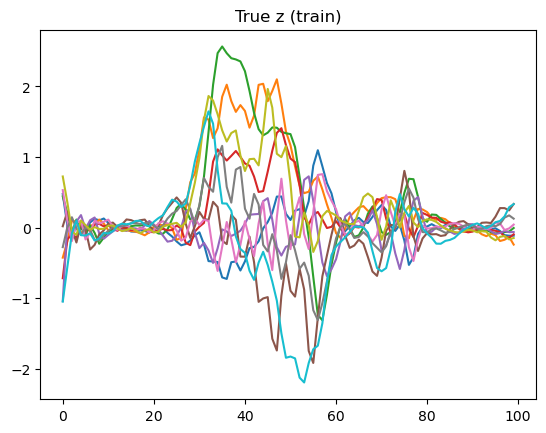

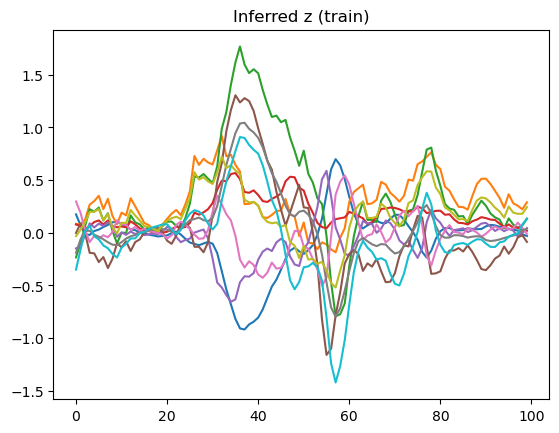

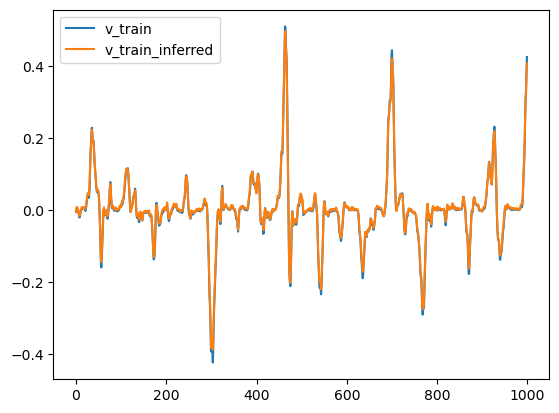

x test 0.7786473164562777 y test 0.7269340674445136 avg 0.7527906919503957
x train 0.996535937065045 y train 0.9931994442644857 avg 0.9948676906647653
x test 0.6887777206360599 y test 0.7016483280854233 avg 0.6952130243607416 trial 0
x test 0.7710188331261267 y test 0.782573857061698 avg 0.7767963450939124 trial 1
x test 0.7626634899710674 y test 0.7967824756409527 avg 0.77972298280601 trial 2
x test 0.7570843364627562 y test 0.7431001656787832 avg 0.7500922510707697 trial 3
x test 0.7982863801058445 y test 0.728347870550413 avg 0.7633171253281288 trial 4
x test 0.7118785775945868 y test 0.7344008333187395 avg 0.7231397054566632 trial 5
x test 0.7937131537789547 y test 0.7171717619302925 avg 0.7554424578546236 trial 6
x test 0.8186160175224797 y test 0.6096346287733185 avg 0.7141253231478991 trial 7
x test 0.8051248600786333 y test 0.7398777409595417 avg 0.7725013005190875 trial 8
x test 0.7646862418797079 y test 0.6752808501183555 avg 0.7199835459990317 trial 9


In [23]:
for trial in range(1):
    if z_train is None:
        z_train = p.get_z_hat(v_train[trial, ...][None, ...].to(device), smoothing=smoothing).detach().cpu().numpy()
    plt.plot(z_train[0, :, :].T)
    plt.title('True z (train)')
    plt.show()

    plt.plot(z_train_inferred[trial, ...].T)
    plt.title('Inferred z (train)')
    plt.show()

if dataset == 'Doherty':
    start = 0
    stop = 1000
    plt.plot(v_train[:,0,:].flatten()[start:stop], label = 'v_train')
    plt.plot(v_train_inferred[:,0,:].flatten()[start:stop], label = 'v_train_inferred')
    plt.legend()
    plt.show()

big_show = False
if big_show:
    for trial in range(1):
        plt.figure(figsize=(15, 5))  # Adjust as needed
        # plt.imshow(_Y_train[trial].T)
        plt.imshow(Y_test[trial].T)
        plt.colorbar()
        plt.title('Spike train (test)')
        plt.show()
        plt.figure(figsize=(15, 5))  # Adjust as needed
        # plt.imshow(rec_model.get_x_tilde(rec_model.gen_model.Y).detach().cpu().numpy()[trial].T)
        pseudo_obs = rec_model.get_x_tilde(Y_test.to(device), only_x_tilde=False)
        x_tilde = pseudo_obs['x_tilde'].detach().cpu().numpy()[trial].T
        plt.imshow(x_tilde)
        # plt.imshow(rec_model.get_x_tilde(Tensor(_Y_test).to(device)).detach().cpu().numpy()[trial].T)
        plt.colorbar(orientation='horizontal')
        plt.title('x_tilde')
        plt.show()
        # rec_model.zero_mean_x_tilde = False
        print(rec_model.get_x_tilde(Y_test.to(device)).detach().cpu().numpy()[trial].shape)
        plt.plot(rec_model.get_x_tilde(Y_test.to(device)).detach().cpu().numpy()[trial].mean(axis=-1))
        plt.title('x_tilde mean')
        plt.show()
        plt.figure(figsize=(15, 5))  # Adjust as needed
        # plt.imshow(rec_model.gen_model.link_fn(model.C @ model.W @ Tensor(z_train[trial]).to(device) + rec_model.gen_model.d[:, None]).detach().cpu().numpy().T)
        plt.imshow(rec_model.gen_model.link_fn(gen_model.C @ gen_model.W @ Tensor(z_test_inferred[trial]).to(device) + rec_model.gen_model.d[:, None]).detach().cpu().numpy().T)
        plt.colorbar()
        plt.title('Firing rate')
        plt.show()

        if pseudo_obs['delta_R'] is not None:
            delta_R = pseudo_obs['delta_R'].detach().cpu().numpy() # (T, ntrials, x_dim)
            for t in range(10):
                plt.plot(delta_R[t, trial, :])
            plt.title('delta_R')
            plt.show()

            if not rec_model.gen_model.full_R:
                plt.plot(rec_model.gen_model.log_sigma_x.detach().cpu().numpy(), label='log_sigma_x')
                plt.legend()
                plt.show()

            new_R = rec_model.gen_model_R(pseudo_obs)[:, trial, ...].detach().cpu().numpy() # (T, x_dim, x_dim)
            R_diag = np.diagonal(new_R, axis1=-1, axis2=-2)
            print(R_diag.shape)
            for t in range(10):
                plt.plot(R_diag[t])
            plt.title('R_diag new')
            plt.show()
            R_orig = rec_model.gen_model_R(pseudo_obs=None).detach().cpu().numpy() # (x_dim, x_dim)
            R_diag_orig = np.diagonal(R_orig, axis1=-1, axis2=-2)
            print(R_diag_orig.shape)
            plt.plot(R_diag_orig)
            plt.title('R_diag orig')
            plt.show()
        if pseudo_obs['delta_W'] is not None:
            delta_W = pseudo_obs['delta_W'].detach().cpu().numpy()
            norms = []
            norms2 = []
            for _trial in range(5):
                norms.append([np.linalg.norm(delta_W[t, _trial] - delta_W[0, _trial], ord='fro') for t in range(16)])
                norms2.append([np.linalg.norm(delta_W[t, _trial], ord='fro') for t in range(16)])
            norms = np.array(norms)
            plt.plot(norms.T)
            plt.title('Frobenius norm of delta_W with respect to first time point')
            plt.show()
            norms2 = np.array(norms2)
            plt.plot(norms2.T)
            plt.title('Frobenius norm of delta_W with respect to true W')
            plt.show()
            
            for t in [0,8,15]:
                plt.figure(figsize=(15, 5))  # Adjust as needed
                # plt.imshow(delta_W[t, trial].T)
                plt.imshow(rec_model.gen_model.W[0].detach().cpu().numpy().T + delta_W[t, trial].T)
                plt.colorbar(orientation='horizontal')
                plt.title('final W')
                plt.show()

# cw_v = np.load('KF.npy')
if dataset == '4g10':
    for trial in range(5):
        plt.plot(v_test_inferred[trial,0,:], label = 'inferred v_x', color='red', linestyle='dotted')
        plt.plot(v_test_inferred[trial,1,:], label = 'inferred v_y', color='blue', linestyle='dotted')
        plt.plot(v_test[trial,0,:], label = 'hand x', color='red')
        plt.plot(v_test[trial,1,:], label = 'hand y', color='blue')
        # plt.plot(cw_v[0,trial,:], label = 'KF x', color='red', linestyle='dashed')
        # plt.plot(cw_v[1,trial,:], label = 'KF y', color='blue', linestyle='dashed')
        plt.legend()
        plt.show()
elif dataset == 'Doherty':
    # trials = list(range(40, 57))
    # plt.plot(v_test_inferred[trials,0,:].flatten(), label = 'inferred v_x')
    # plt.plot(v_test[trials,0,:].flatten(), label = 'v_x')
    # plt.legend()
    # plt.show()

    # plt.plot(v_test_inferred[trials,1,:].flatten(), label = 'inferred v_y')
    # plt.plot(v_test[trials,1,:].flatten(), label = 'v_y')
    # plt.legend()
    # plt.show()
    pass

x_test_score = r2_score(v_test[:,0,:].flatten(), v_test_inferred[:,0,:].flatten())
y_test_score = r2_score(v_test[:,1,:].flatten(), v_test_inferred[:,1,:].flatten())
print('x test', x_test_score, 'y test', y_test_score, 'avg', (x_test_score + y_test_score)/2)

# calculate R2 on train data
x_train_score = r2_score(v_train[:,0,:].flatten(), v_train_inferred[:,0,:].flatten())
y_train_score = r2_score(v_train[:,1,:].flatten(), v_train_inferred[:,1,:].flatten())
print('x train', x_train_score, 'y train', y_train_score, 'avg', (x_train_score + y_train_score)/2)

if dataset == 'Doherty':
    for trial in range(v_test_inferred.shape[0]):
        x_test_score = r2_score(v_test[trial,0,:], v_test_inferred[trial,0,:])
        y_test_score = r2_score(v_test[trial,1,:], v_test_inferred[trial,1,:])
        print('x test', x_test_score, 'y test', y_test_score, 'avg', (x_test_score + y_test_score)/2, 'trial', trial)

# x_test_score_cw = r2_score(hand_test[:,0,:].flatten(), cw_v[0].flatten())
# y_test_score_cw = r2_score(hand_test[:,1,:].flatten(), cw_v[1].flatten())
# print('x test cw', x_test_score_cw, 'y test cw', y_test_score_cw, 'avg cw', (x_test_score_cw + y_test_score_cw)/2)

In [24]:
print(p.T)

5000
